# Problem statement(case-study)

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 



### Importing Libraries

In [342]:
import pandas as pd              #used to load
import numpy as np               #to do arrays with arrays and matrices
import seaborn as sns            #visualise dataset
import matplotlib.pyplot as plt
import warnings                  #to avoid unnecessary information printed by modules
warnings.filterwarnings('ignore')

### Loading the DataSet

In [343]:
train_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [344]:
train_df.shape

(8523, 12)

In [345]:
test_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [346]:
test_df.shape

(5681, 11)

In [347]:
train_df['source']= 'Train'
test_df['source'] = 'Test'
df= pd.concat([train_df,test_df])

# lets check the unique values for each feature in the population

In [348]:
cnt1 = df['Item_Identifier'].unique()
print(len(cnt1))

1559


As mentioned in the case study description we have 1559 items in the dataset

In [349]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Basically we have only 2 categeorical variables in the datset that is
* low fat
* regular

with differnet naming conventions

In [350]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [351]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

- We have 10 outlets in the data set

In [352]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

- For this we need soem data preprocessing as we have some nan values

In [353]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

3 types of Location Tiers are present in population

In [354]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

4 types of outlet types are present in dataset

In [355]:
## orelse we can also use lambda function to get unique values
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

# Finding null values in population

#### we have null values in 2 features of the entire population

In [356]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<AxesSubplot:>

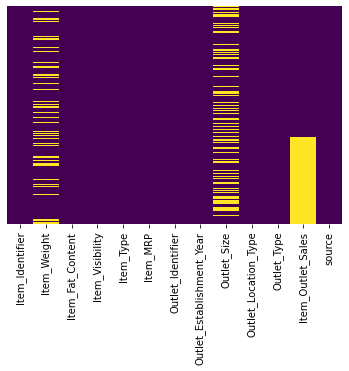

In [357]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we have 2 attributes with heavy null values
- item_weight
- Outlet_Size


Any ways in the Item_Outlet_Sales we have null values because we have test data

### Check for categeorical attributes

In [358]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

The categeorical attributes are present in
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [359]:
# we dont need item_identifier, outlet_identifier so removing it from list
features_list.remove('Item_Identifier')
features_list.remove('Outlet_Identifier')
features_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [360]:
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
--------------------------------------
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
--------------------------------------
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
--------------------------------------
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
---------------------------------

In [361]:
df['source'].unique()

array(['Train', 'Test'], dtype=object)

### Observation
- Item_Fat_Content
    * Low fat and regular has been repeated again with other name
- Item_Type
    * we have 16 item types
- Outlet_Size
    * we have 3 outlet size category variables
- Outlet_Location_Type
    * we have 3 outlet location type category variables
- Outlet_Type
    * we have 4 outlet types

# Filling Null/missing Values

#### Filling Item_Weight values based on Item_Identifier categery mean

In [362]:
item_weight_mean = df.pivot_table(values="Item_Weight", index= "Item_Identifier")
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


lets fill the missing values based on the categeory
- for Item_weight iam taking the Item_Identifier as categeory
    * as we can see for DRA12 categeory the mean is 11.600
    * for DRA24 mean is 19.350 
    * and so on ......

In [363]:
#df[df['price'] < 20000]

miss_bool = df[df['Item_Weight'].isnull()]
miss_bool

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,Train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,Train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,Train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,Test


In [364]:
len(df['Item_Weight'])

14204

In [365]:
print("Missing Item_Weight : " , df['Item_Weight'].isnull().sum()  )
df.loc[df['Item_Weight'].isnull(), "Item_Weight"] =   df.loc[df['Item_Weight'].isnull(), "Item_Identifier"]. apply ( lambda x : item_weight_mean.loc[x])
print("Missing Item_Weight : " , df['Item_Weight'].isnull().sum()  )

Missing Item_Weight :  2439
Missing Item_Weight :  0


### lets check null values for Item Identifier

In [366]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

we can see there are no null values in Item Identifier Now

#### filling Outlet_Size null values with the help of Outlet_Type Values

In [367]:
Outlet_Size_Mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
Outlet_Size_Mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


- For the corresponding outlet type we have outlet size
- Because of catgeorical vlaues we are going for mode

In [368]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: Outlet_Size_Mode[x])

In [369]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [370]:
# we have filled all the null values

### lets check if any column having 0's as the value

In [371]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [372]:
for i in df.columns:
    print(i, sum(df[i]==0))

Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 879
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 0
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0
source 0


- Item Visibility has more 0 values in the dataset lets override those with mean values

In [373]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()],inplace=True)

In [374]:
sum(df['Item_Visibility']==0)

0

- Now all the zero values are taken and replaced with mean of that feature

#### In the Item_Fat_Content we have some same categeorical values lets standardize them

In [375]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [376]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})

In [377]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

- Now all are set to two values that is Low Fat and Regular

In [378]:
# creating a new column to get the categeories of the Item Identifier
df['new_item_type'] = df['Item_Identifier'].apply(lambda x:x[:2])
df['new_item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: new_item_type, Length: 14204, dtype: object

In [379]:
#fetching the values of the new column
df['new_item_type'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [380]:
#mapping the unique values to a unique user friendly name
df['new_item_type'] = df['new_item_type'].map({'FD':'Food','DR':'Drinks','NC':'Non Consumable'})

In [381]:
# creating a new insight for the Item_Fat_Content
df.loc[df['new_item_type'] == 'Non Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [382]:
# create small values for establishment year
df['Outlet_Year'] = 2013 - df['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,new_item_type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,Non Consumable,26


# Visualisation

## Numerical Attributes

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

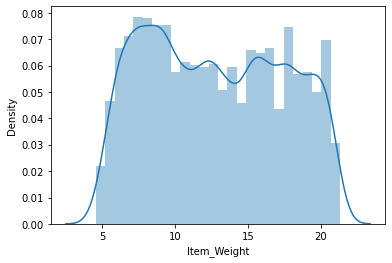

In [383]:
sns.distplot(df['Item_Weight'])

- mean is higher as we added values with mean which are in high number

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

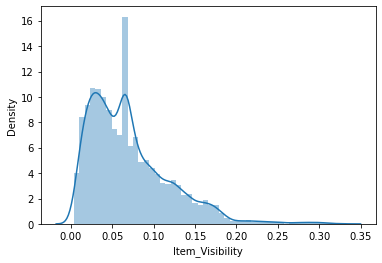

In [384]:
sns.distplot(df['Item_Visibility'])

- we have skewness towards left
- as all are small values no need to worry

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

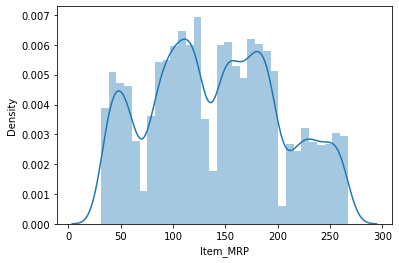

In [385]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

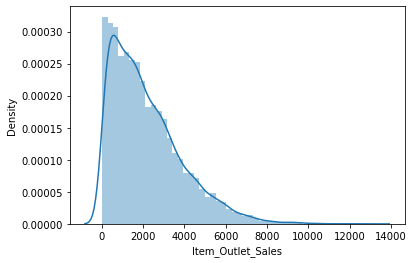

In [386]:
sns.distplot(df['Item_Outlet_Sales'])

- The dataset is skewed towrds left

In [387]:
# log transformation for Item_Outlet_Sales
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

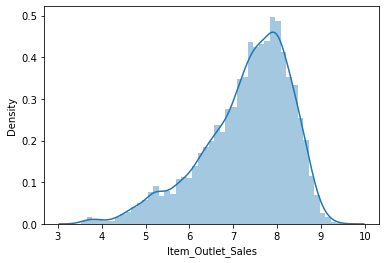

In [388]:
sns.distplot(df['Item_Outlet_Sales'])

## Categeorical attributes

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

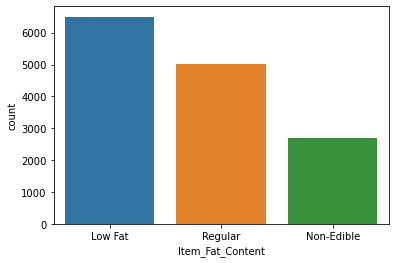

In [389]:
sns.countplot(df['Item_Fat_Content'])

- Low Fat Content is more in the dataset

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

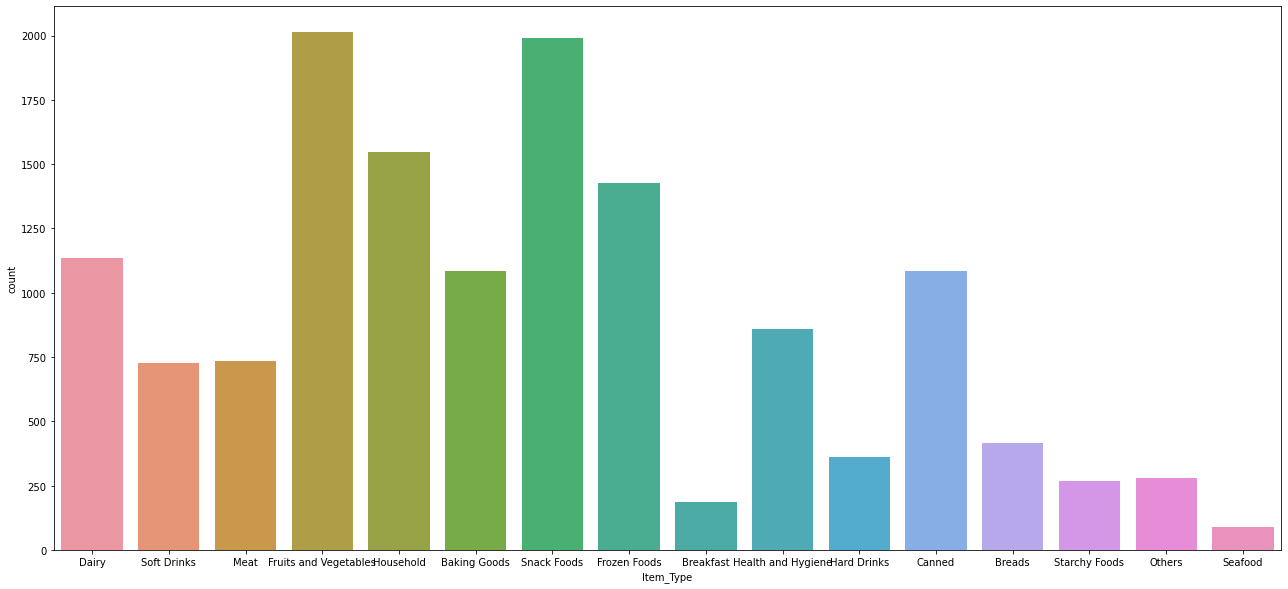

In [390]:
plt.figure(figsize=(22,10))
sns.countplot(df['Item_Type'])

- Fruits,Vegetables and snack foods are high in nummber
- seafood has low numbers in dataset

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

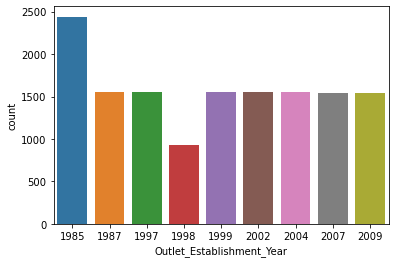

In [391]:
sns.countplot(df['Outlet_Establishment_Year'])

- In 1985 there are many outlets established
- In 1998 there are less oulets established
- And in remaining years there is uniform establishments of outlets

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

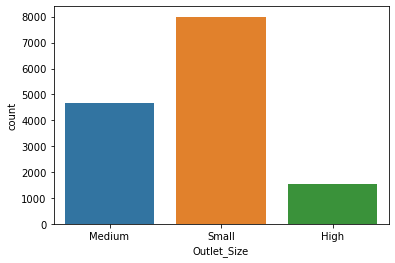

In [392]:
sns.countplot(df['Outlet_Size'])

- Small outlet sizes are more in Number

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

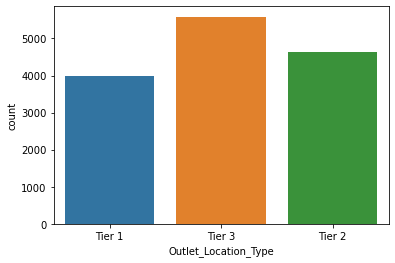

In [393]:
sns.countplot(df['Outlet_Location_Type'])

- Tier3 type is more in DataSet

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

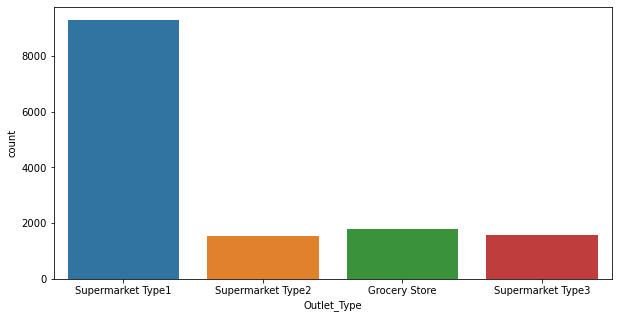

In [394]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

- Super Market of Type-1 is more in Number
- Super Market Type-2 and Super Market Type-3 is less in Number

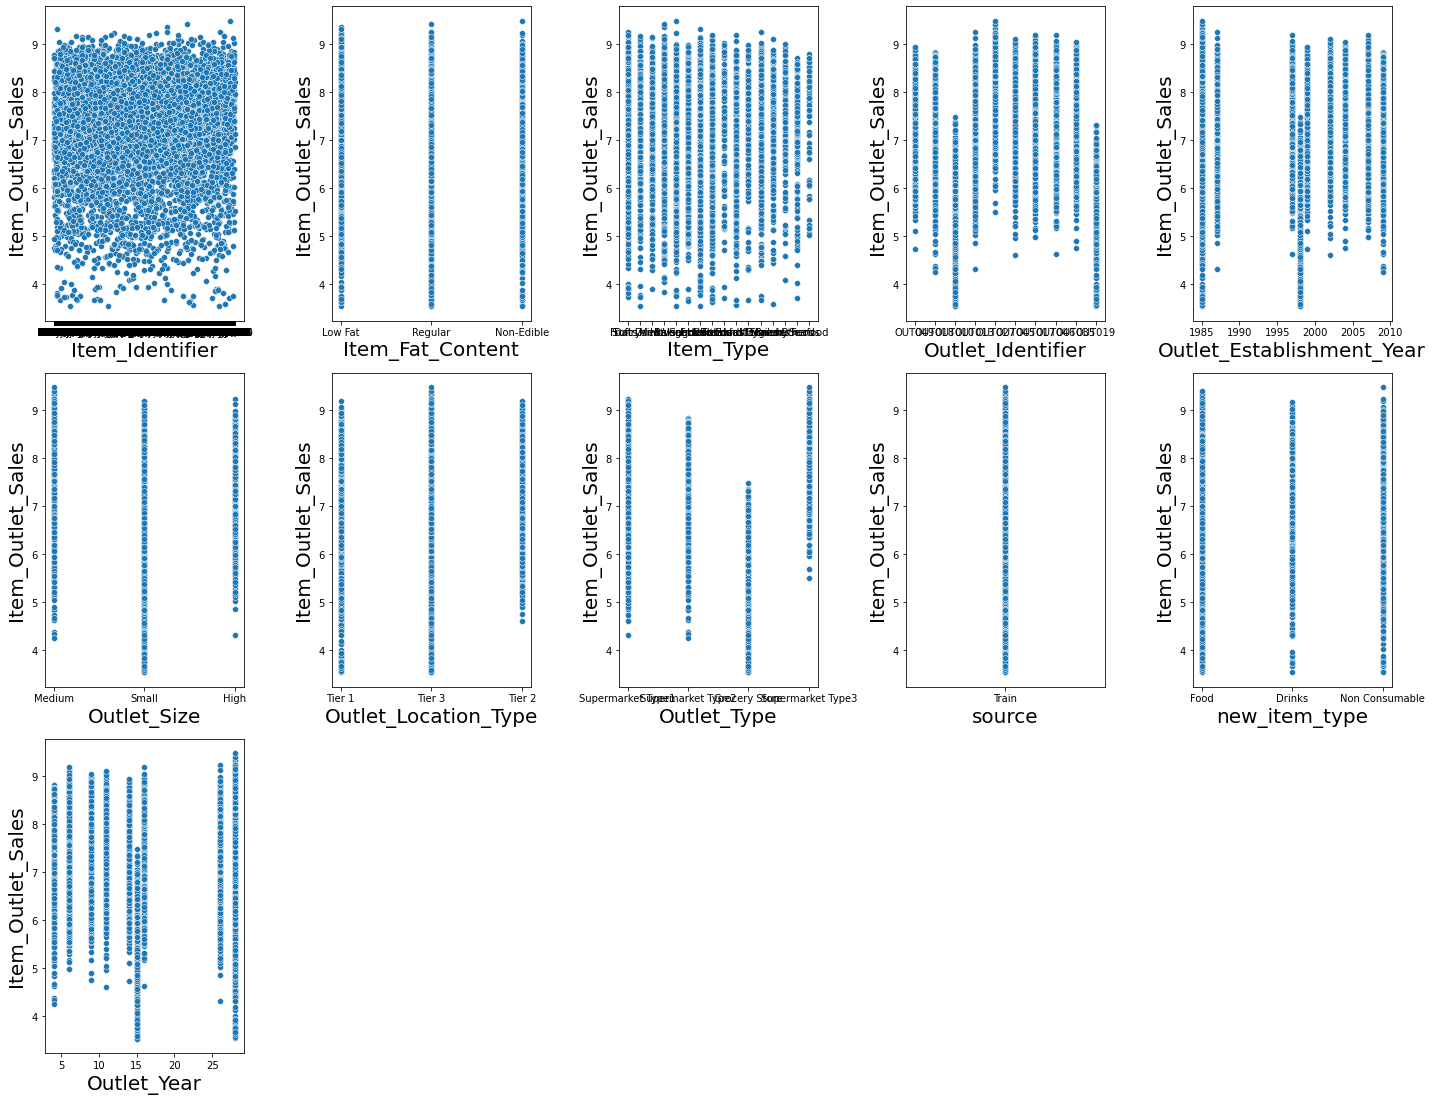

In [395]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

- From the above graphs it is observed that Outlet_type has a positive relation with Item_Outlet_sales.
- Supermarket Type3 generates the more sales when compared to the Supermarket types 1 and 2 and Grocery Stores.
- Tier 3 City Outlets generate a lot of sales. Age of the establishment also plays an important role when age of the establishment is above 30. This maybe because Outlets that have been running for the longest sell the highest.

## Correaltion Matrix

<AxesSubplot:>

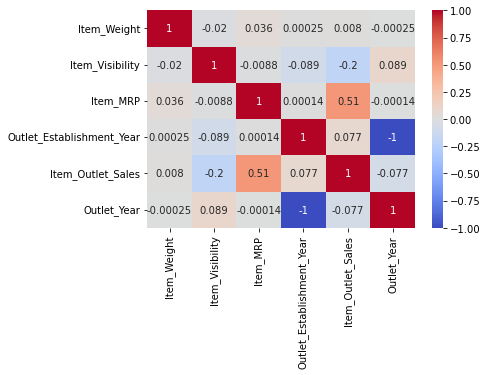

In [396]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

- Nothing is contributing much in the numerical values
- as the Outlet Year is taken from the Outlet_Establishment_Year lets drop Outlet_Establishment_Year as it is of no use

In [397]:
df.drop('Outlet_Establishment_Year',axis=1, inplace=True)

## Label Encoding

In [398]:
df.sample()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,new_item_type,Outlet_Year
7745,FDD47,7.6,Regular,0.1427,Starchy Foods,171.7448,OUT045,Small,Tier 2,Supermarket Type1,8.396734,Train,Food,11


In [399]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','new_item_type']
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [400]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,new_item_type,Outlet_Year
0,FDA15,9.300,0,0.016047,4,249.8092,9,1,0,1,8.225808,Train,1,14
1,DRC01,5.920,2,0.019278,14,48.2692,3,1,2,2,6.096776,Train,0,4
2,FDN15,17.500,0,0.016760,10,141.6180,9,1,0,1,7.648868,Train,1,14
3,FDX07,19.200,2,0.065953,6,182.0950,0,2,2,0,6.597664,Train,1,15
4,NCD19,8.930,1,0.065953,9,53.8614,1,0,2,1,6.903451,Train,2,26
5,FDP36,10.395,2,0.065953,0,51.4008,3,1,2,2,6.323658,Train,1,4
6,FDO10,13.650,2,0.012741,13,57.6588,1,0,2,1,5.842247,Train,1,26
7,FDP10,19.000,0,0.127470,13,107.7622,5,1,2,3,8.299973,Train,1,28
8,FDH17,16.200,2,0.016687,5,96.9726,7,2,1,1,6.982490,Train,1,11
9,FDU28,19.200,2,0.094450,5,187.8214,2,2,1,1,8.457769,Train,1,6


##### For getting more prediction in model we use onehot encoding

In [401]:
train_df = df[df['source'] == 'Train']
test_df = df[df['source'] == 'Test']

In [402]:
### Train Test split
x = train_df.drop(columns=['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales','source'])
y = train_df['Item_Outlet_Sales']

In [403]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred = model.predict(x)
    
    #perform cross validation
    cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('model report')
    print('MSE', mean_squared_error(y,pred))
    print("CV Score", cv_score)

model report
MSE 0.4400108486228648
CV Score 0.44124430751651467


<AxesSubplot:title={'center':'Model Coefficients'}>

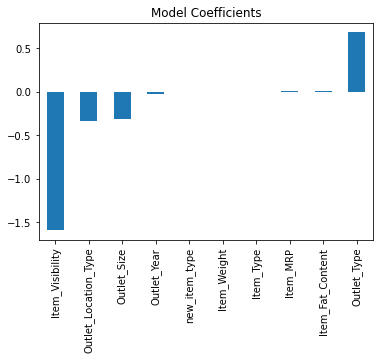

In [404]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

- Major negative coefficients are
    * item_visibility
    * outlet_location_type
    * outlet_Size
    * outlet_year

model report
MSE 0.608417693703772
CV Score 0.6093348048426269


<AxesSubplot:title={'center':'Model Coefficients'}>

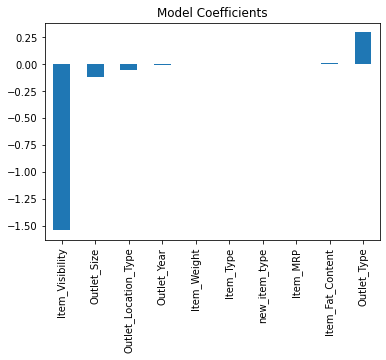

In [405]:
model = Ridge(normalize=True)
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE 0.7628688679102086
CV Score 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

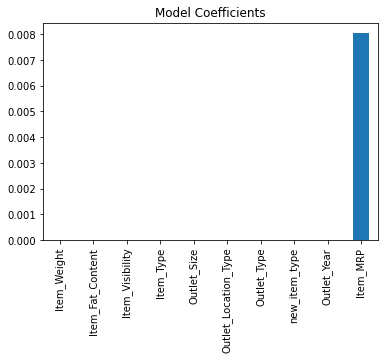

In [406]:
model = Lasso()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

model report
MSE 3.470876914911175e-34
CV Score 0.5742829227733999


<AxesSubplot:title={'center':'Feature Importance'}>

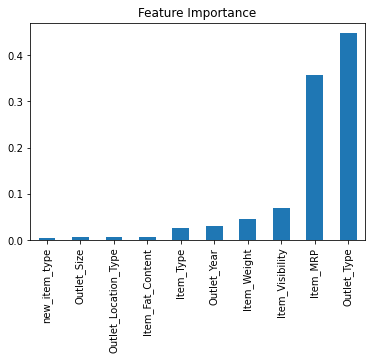

In [407]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

model report
MSE 0.04289125445325847
CV Score 0.3106160460984094


<AxesSubplot:title={'center':'Feature Importance'}>

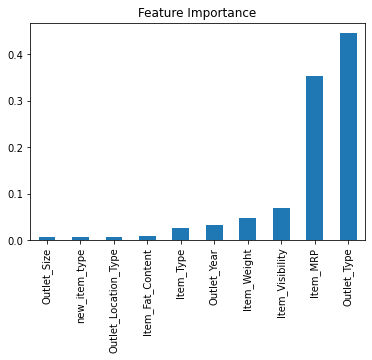

In [408]:
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()
train(reg_model,x,y)
coef = pd.Series(reg_model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

model report
MSE 1.041778615391114e-28
CV Score 0.32793163707331885


<AxesSubplot:title={'center':'Feature Importance'}>

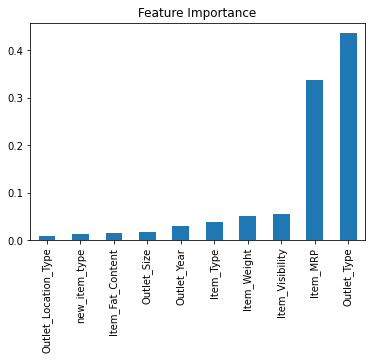

In [409]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

# Saving The Model

In [410]:
import joblib
joblib.dump(reg_model,"big_data_mart.pkl")

['big_data_mart.pkl']

# Loading the model

In [411]:
x = test_df.drop(columns=['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales','source'])

In [412]:
load_model = joblib.load('big_data_mart.pkl')

In [413]:
output = load_model.predict(x)


In [414]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_item_type,Outlet_Year
0,20.750,0,0.007565,13,107.8622,1,0,1,1,14
1,8.300,2,0.038428,4,87.3198,2,1,1,1,6
2,14.600,1,0.099575,11,241.7538,2,2,0,2,15
3,7.315,0,0.015388,13,155.0340,2,1,1,1,6
4,13.600,2,0.118599,4,234.2300,1,2,3,1,28


In [415]:
x.shape

(5681, 10)

In [419]:
x['Item_Outlet_Sales']=output
  
# saving the dataframe
x.to_csv('bigdatamart_test_output.csv')